In [46]:
from plotly.offline import iplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import pandas as pd
import numpy as np
from os import walk
from tqdm.auto import tqdm
from datetime import datetime
import seaborn as sn
from sklearn.cluster import KMeans
import matplotlib

In [47]:
train_df = pd.read_csv("./aggregated_data/labeled_5s_candles.csv")
train_df.drop(["Unnamed: 0"], axis=1, inplace=True)
train_df.dropna(inplace=True)
train_df

,timestamp,open,high,low,close,volume,score
12,2021-02-27 15:08:55,1483.68,1483.92,1483.56,1483.56,8.40117,-0.956559
13,2021-02-27 15:09:00,1483.27,1483.28,1483.11,1483.11,1.92292,-1.064994
14,2021-02-27 15:09:05,1482.49,1482.49,1482.16,1482.19,3.57305,-1.053513
15,2021-02-27 15:09:10,1482.36,1482.73,1482.22,1482.73,2.02586,-0.954966
16,2021-02-27 15:09:15,1482.60,1483.39,1482.51,1483.39,1.71675,-0.859152
...,...,...,...,...,...,...,...
34318,2021-03-01 14:26:00,1530.01,1530.49,1530.00,1530.49,15.21124,-0.521830
34319,2021-03-01 14:26:05,1530.42,1530.42,1530.01,1530.08,3.90970,-0.378777
34320,2021-03-01 14:26:10,1530.00,1530.25,1530.00,1530.25,11.90400,-0.241758
34321,2021-03-01 14:26:15,1530.56,1531.35,1530.56,1531.35,2.72905,-0.114336


In [48]:
def relabel_df(train_df):
    relabel_dict = {
        1:3,
        4:1,
        2:0,
        3:4,
        0:2
    }
    train_df["class"] = train_df["class"].map(relabel_dict)
    
def relabel_prediction(array):
    relabel_dict = {
        1:3,
        4:1,
        2:0,
        3:4,
        0:2
    }
    return np.vectorize(relabel_dict.get)(array)

In [49]:
kmeans = KMeans(algorithm='auto', init='k-means++', max_iter=1000,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.001, verbose=0)

train_df["class"]  = kmeans.fit_predict(train_df[['score']])

heights = train_df["class"].value_counts()/len(train_df["class"])
print(heights)
train_df["percs"] = train_df["class"].map(heights.to_dict())
train_df

/home/arathus/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:788: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

/home/arathus/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



0    0.366734
4    0.280260
1    0.230276
2    0.070706
3    0.052024
Name: class, dtype: float64


,timestamp,open,high,low,close,volume,score,class,percs
12,2021-02-27 15:08:55,1483.68,1483.92,1483.56,1483.56,8.40117,-0.956559,4,0.280260
13,2021-02-27 15:09:00,1483.27,1483.28,1483.11,1483.11,1.92292,-1.064994,4,0.280260
14,2021-02-27 15:09:05,1482.49,1482.49,1482.16,1482.19,3.57305,-1.053513,4,0.280260
15,2021-02-27 15:09:10,1482.36,1482.73,1482.22,1482.73,2.02586,-0.954966,4,0.280260
16,2021-02-27 15:09:15,1482.60,1483.39,1482.51,1483.39,1.71675,-0.859152,4,0.280260
...,...,...,...,...,...,...,...,...,...
34318,2021-03-01 14:26:00,1530.01,1530.49,1530.00,1530.49,15.21124,-0.521830,4,0.280260
34319,2021-03-01 14:26:05,1530.42,1530.42,1530.01,1530.08,3.90970,-0.378777,4,0.280260
34320,2021-03-01 14:26:10,1530.00,1530.25,1530.00,1530.25,11.90400,-0.241758,0,0.366734
34321,2021-03-01 14:26:15,1530.56,1531.35,1530.56,1531.35,2.72905,-0.114336,0,0.366734


## Deep Learning

Fontos egy relabelinget csinálnunk annak értelmében, hogy később értelmezni tudjuk az egyes kategóriákat. 0-5 ig --> legerősebb negatív trend - legerősebb pozitív trend.

In [50]:
def relabel_df(train_df):
    relabel_dict = {
        1:3,
        4:1,
        2:0,
        3:4,
        0:2
    }
    train_df["class"] = train_df["class"].map(relabel_dict)
    
def relabel_prediction(array):
    relabel_dict = {
        1:3,
        4:1,
        2:0,
        3:4,
        0:2
    }
    return np.vectorize(relabel_dict.get)(array)

2    0.366734
1    0.280260
3    0.230276
0    0.070706
4    0.052024
Name: class, dtype: float64


Text(0.5, 0, 'Score values')

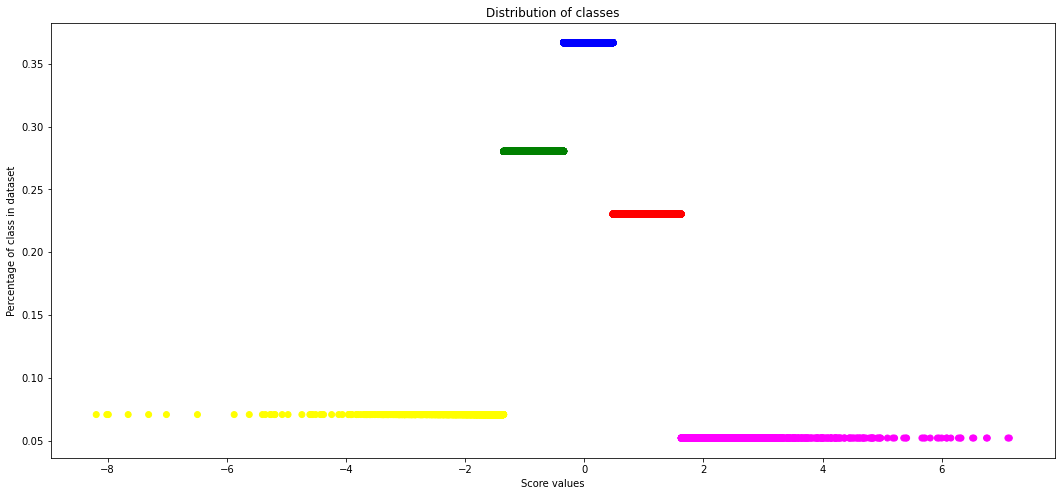

In [51]:
relabel_df(train_df)

heights = train_df["class"].value_counts()/len(train_df["class"])
print(heights)
ar = train_df["score"].values
y = train_df["percs"].values
label = train_df["class"].values

colors = ['yellow','green','blue', "red", "magenta"]

plt.figure(figsize=(18,8))
plt.scatter(ar, y + 0., c=label,cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Distribution of classes')
plt.ylabel('Percentage of class in dataset')
plt.xlabel('Score values')

In teaching the Conv1D mesh, I used the same datasets as in the LSTM approach, and the teaching was done in a similar approach.

In [52]:
dl_train1 = train_df.copy()

params = np.array(dl_train1.drop(["score", "timestamp", "class", "percs"], axis=1).values)
all_arr = list()
for i in tqdm(range(13, len(params))):
    all_arr.append((params[i-12:i]/params[i-13])-1)
    
x = np.array(all_arr)

_y = np.array(dl_train1[["class"]].values)

y = _y

x = x
y = y[13:]

print(np.shape(x))
print(np.shape(y))

  0%|          | 0/34298 [00:00<?, ?it/s]

(34298, 12, 5)
(34298, 1)


In [53]:
# random shuffle
import random
from sklearn.model_selection import train_test_split

random.seed(42)

concat = list(zip(x,y))
random.shuffle(concat)

x, y = zip(*concat)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

## one-hot encoding
a = y_train.reshape(-1)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
y_train = b

a = y_test.reshape(-1)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
y_test = b

### Deep Learning 1DConv with OHLC (+ Volume)

In [31]:
from keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import GlobalAveragePooling1D
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import LeakyReLU

In [32]:
r = 0
T = 12
D = 5

model = Sequential()
model.add(Conv1D(100, 6, activation='relu', input_shape=(T, D)))
model.add(Dropout(0.15))
model.add(Conv1D(100, 6))
model.add(LeakyReLU(alpha=0.12))
model.add(MaxPooling1D(2))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.12))
model.add(Flatten())
model.add(Dense(50))
model.add(LeakyReLU(alpha=0.08))
model.add(Dense(20, activation='relu'))
model.add(Dense(units = 5, activation='softmax'))

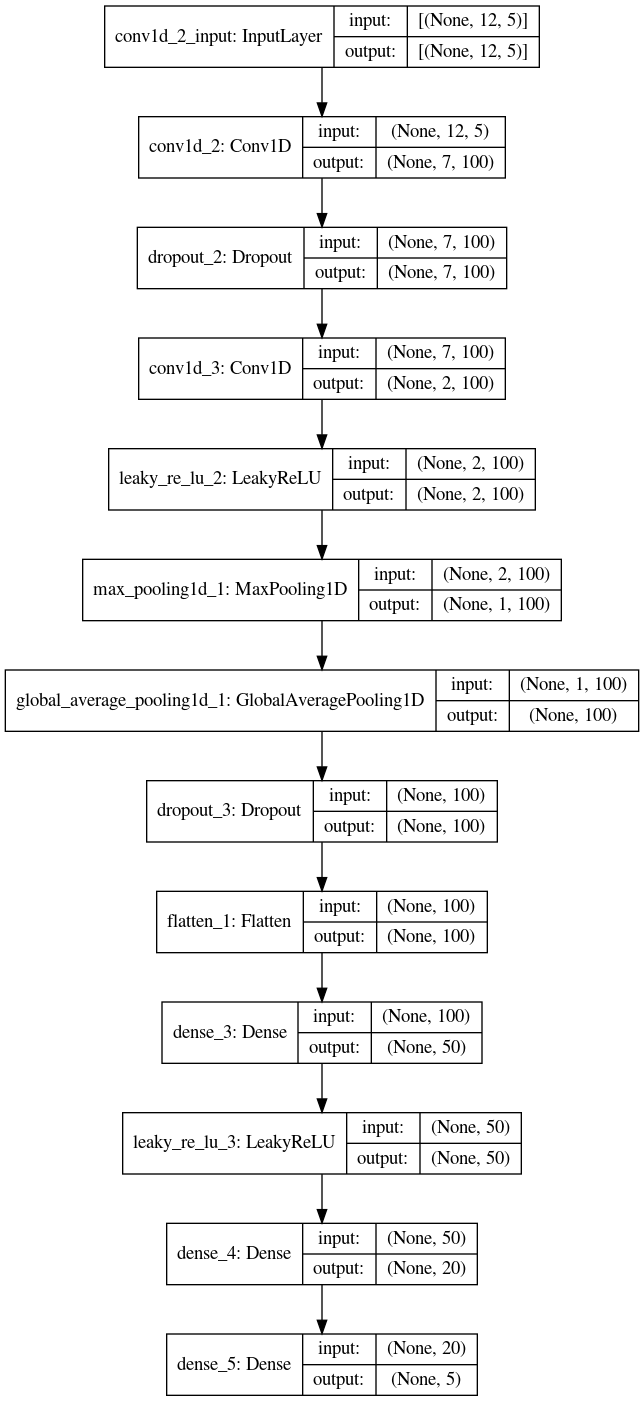

In [33]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file="./images/simple_conv1d.png", show_shapes=True)

In [34]:
# define model


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# opt = RMSprop(learning_rate=0.005, momentum=0.9, clipnorm=1.0)
# model.compile(optimizer = opt, loss = 'mean_squared_error')# Fitting the RNN to the Training set

checkpoint_filepath = './tmp/simple_conv1d'

model_checkpoint_callback = ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)

cutpoint = -int(len(X_train)*0.2)

r = model.fit(X_train[:cutpoint], y_train[:cutpoint],
              validation_data=(X_test[cutpoint:], y_test[cutpoint:]), 
              epochs = 20, batch_size = 60, 
              callbacks=[model_checkpoint_callback])

model.load_weights(checkpoint_filepath)
model.save('./models/simple_conv1d')

Epoch 1/20
412/412 [==============================] - 37s 82ms/step - loss: 1.4984 - accuracy: 0.3462 - val_loss: 2.4400 - val_accuracy: 0.3802
Epoch 2/20
412/412 [==============================] - 26s 64ms/step - loss: 1.4120 - accuracy: 0.3632 - val_loss: 1.4910 - val_accuracy: 0.4111
Epoch 3/20
412/412 [==============================] - 25s 60ms/step - loss: 1.1949 - accuracy: 0.4709 - val_loss: 0.9571 - val_accuracy: 0.6257
Epoch 4/20
412/412 [==============================] - 27s 66ms/step - loss: 0.8773 - accuracy: 0.6140 - val_loss: 0.7634 - val_accuracy: 0.6755
Epoch 5/20
412/412 [==============================] - 25s 62ms/step - loss: 0.7984 - accuracy: 0.6499 - val_loss: 0.8668 - val_accuracy: 0.6997
Epoch 6/20
412/412 [==============================] - 23s 56ms/step - loss: 0.7290 - accuracy: 0.6847 - val_loss: 0.7941 - val_accuracy: 0.7070
Epoch 7/20
412/412 [==============================] - 26s 62ms/step - loss: 0.7432 - accuracy: 0.6774 - val_loss: 0.7387 - val_accuracy:

Overall accuracy:  0.7766763848396502 

class 0 accuracy: 66.2338 %
class 1 accuracy: 77.6008 %
class 2 accuracy: 85.4503 %
class 3 accuracy: 71.6495 %
class 4 accuracy: 62.6374 %


<AxesSubplot:>

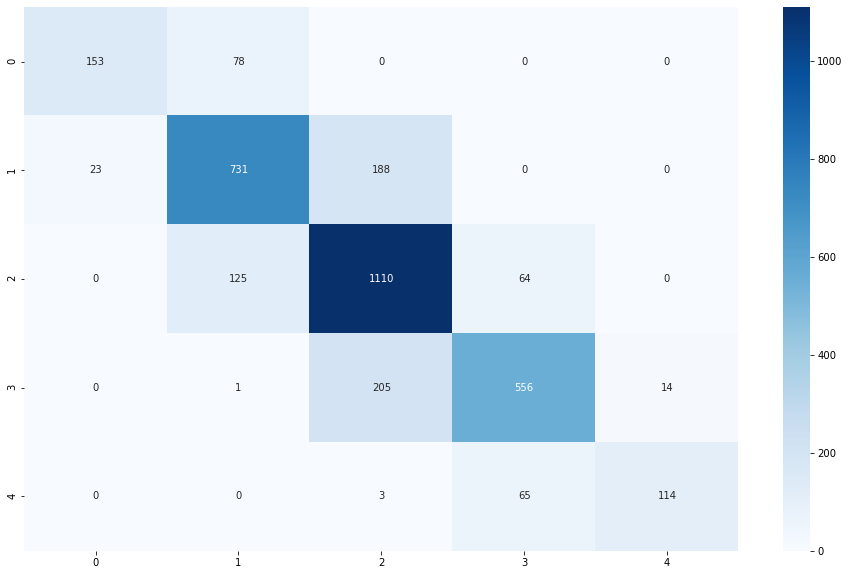

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow import keras

model = keras.models.load_model('./models/simple_conv1d')

y_pred1 = model.predict(X_test)

print("Overall accuracy: ",
      accuracy_score(relabel_prediction(y_test.argmax(axis=1)), relabel_prediction(y_pred1.argmax(axis=1))), "\n")

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred1.argmax(axis=1))

class_percentages = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
for idx, pct in enumerate(class_percentages.diagonal()):
    print(f"class {idx} accuracy:", "{:.4f} %".format(pct*100))

df_cm = pd.DataFrame(matrix, index = [str(i) for i in range(5)],
                  columns = [str(i) for i in range(5)])
plt.figure(figsize = (16,10))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

### Deep Learning 1DConv with OHLC (+ Volume) + Trades

In [61]:
dl_train2 = train_df.copy()

trades_df = pd.read_csv("./aggregated_data/5s_trades_all.csv")
trades_df.drop(["Unnamed: 0"], axis=1, inplace=True)

dl_train2 = pd.merge(dl_train2, trades_df, on="timestamp")

dl_train2["sentiment"] = \
(dl_train2["sentiment_weighted_avg_price"]>=1).astype(int).replace(0, -1)

dl_train2["sentiment_weighted_avg_price"] = np.abs(dl_train2["sentiment_weighted_avg_price"])

def windowed_value(wind_13):
    first = wind_13[0][:-1]
    whole =  wind_13[1:,:-1]
    side_values = np.array([i[-1] for i in wind_13])[1:]
    regularized = (whole/first)-1
    return np.hstack((regularized, side_values.reshape(-1,1)))


params = np.array(dl_train2.drop(["score", "timestamp", "class", "percs"], axis=1).values)
all_arr = list()
for i in tqdm(range(13, len(params))):
    all_arr.append(windowed_value(params[i-13:i]))

x = np.array(all_arr)

_y = np.array(dl_train2[["class"]].values)

y = _y

x = x
y = y[13:]

print(np.shape(x))
print(np.shape(y))

  0%|          | 0/34620 [00:00<?, ?it/s]

(34620, 12, 9)
(34620, 1)


In [62]:
# random shuffle
import random
from sklearn.model_selection import train_test_split

random.seed(42)

concat = list(zip(x,y))
random.shuffle(concat)

x, y = zip(*concat)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

## one-hot encoding
a = y_train.reshape(-1)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
y_train = b

a = y_test.reshape(-1)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
y_test = b

In [63]:
X1_train, X2_train = np.dsplit(X_train, np.array([5, 9]))[0], np.dsplit(X_train, np.array([5, 9]))[1]
X1_test, X2_test = np.dsplit(X_test, np.array([5, 9]))[0], np.dsplit(X_test, np.array([5, 9]))[1]

### Model

In [39]:
from keras.layers.merge import concatenate
from keras.models import Model

In [40]:
def first_head():
    input1 = Input(shape=(12, 5))
    cnn1 = Conv1D(180, 6)(input1)
    cnn1 = LeakyReLU(alpha=0.15)(cnn1)
    cnn1 = Dropout(0.2)(cnn1)
    cnn1 = Conv1D(100, 6)(cnn1)
    cnn1 = LeakyReLU(alpha=0.12)(cnn1)
    cnn1 = MaxPooling1D(2)(cnn1)
    cnn1 = GlobalAveragePooling1D()(cnn1)
    cnn1 = Dropout(0.12)(cnn1)
    cnn1 = Flatten()(cnn1)
    return input1, cnn1

def second_head():
    input2 = Input(shape=(12, 4))
    cnn2 = Conv1D(120, 6, activation='relu')(input2)
    cnn2 = Dropout(0.15)(cnn2)
    cnn2 = Conv1D(80, 5)(cnn2)
    cnn2 = LeakyReLU(alpha=0.1)(cnn2)
    cnn2 = MaxPooling1D(2)(cnn2)
    cnn2 = GlobalAveragePooling1D()(cnn2)
    cnn2 = Dropout(0.12)(cnn2)
    cnn2 = Flatten()(cnn2)
    return input2, cnn2

In [41]:
input_1, cnn_1 = first_head()
input_2, cnn_2 = second_head()

merge = concatenate([cnn_1, cnn_2])

dense1 = Dense(100)(merge)
activ = LeakyReLU(alpha=0.1)(dense1)
dense2 = Dense(20, activation='relu')(activ)
output = Dense(units = 5, activation='softmax')(dense2)

model = Model(inputs=[input_1, input_2], outputs=output)

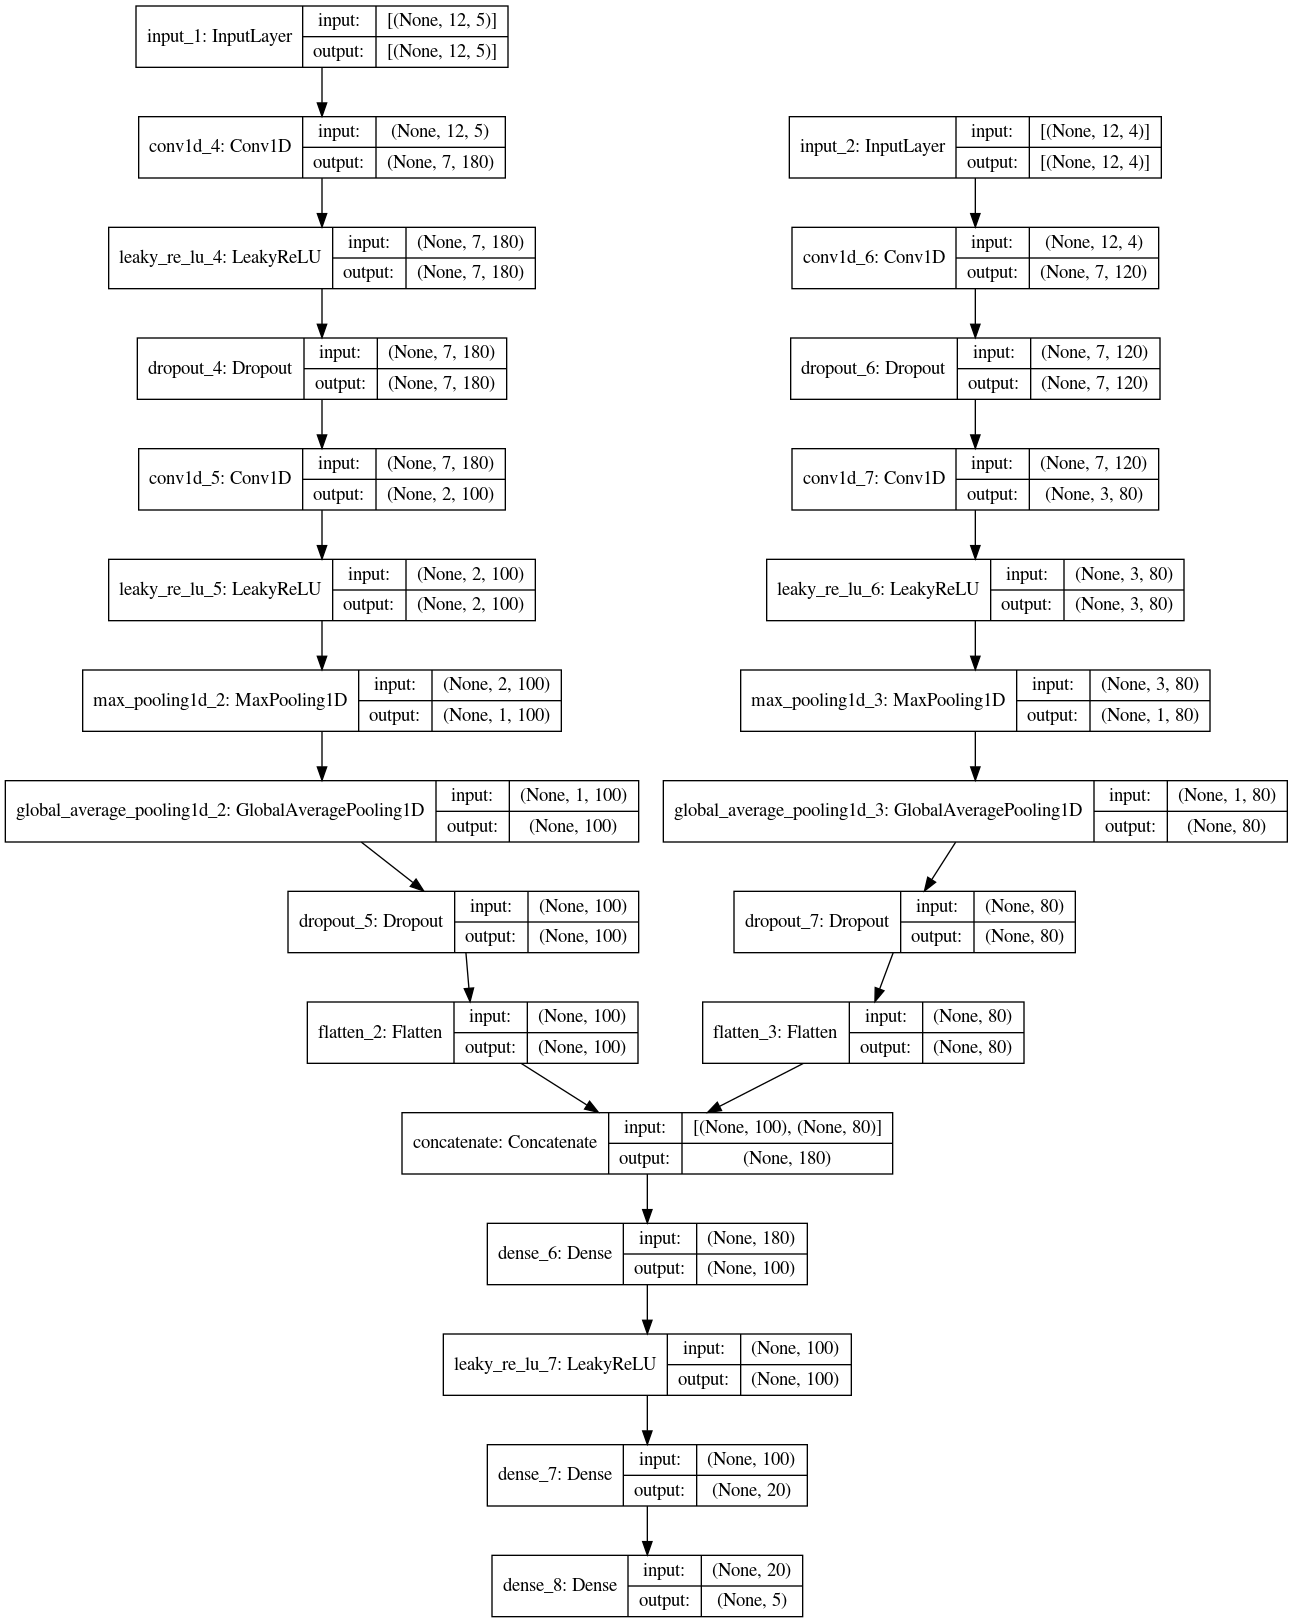

In [42]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file="./images/simple_conv1d_with_trades.png", show_shapes=True)

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint_filepath = './tmp/simple_conv1d_with_trades'

model_checkpoint_callback = ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)


cutpoint = -int(len(X1_train)*0.2)

r = model.fit([X1_train[:cutpoint], X2_train[:cutpoint]],
              y_train[:cutpoint],
              validation_data=([X1_test[cutpoint:], X2_test[cutpoint:]], y_test[cutpoint:]), 
              epochs = 40, 
              batch_size = 50, 
              callbacks=[model_checkpoint_callback])

model.load_weights(checkpoint_filepath)
model.save('./models/simple_conv1d_with_trades')

Epoch 1/40
499/499 [==============================] - 64s 120ms/step - loss: 2.1266 - accuracy: 0.3435 - val_loss: 1.4285 - val_accuracy: 0.3544
Epoch 2/40
499/499 [==============================] - 60s 121ms/step - loss: 1.4870 - accuracy: 0.3610 - val_loss: 1.3735 - val_accuracy: 0.3983
Epoch 3/40
499/499 [==============================] - 65s 130ms/step - loss: 1.2888 - accuracy: 0.4205 - val_loss: 1.0191 - val_accuracy: 0.5589
Epoch 4/40
499/499 [==============================] - 67s 135ms/step - loss: 1.0836 - accuracy: 0.5562 - val_loss: 0.8638 - val_accuracy: 0.6314
Epoch 5/40
499/499 [==============================] - 57s 114ms/step - loss: 0.8851 - accuracy: 0.6141 - val_loss: 0.7455 - val_accuracy: 0.6924
Epoch 6/40
499/499 [==============================] - 58s 116ms/step - loss: 0.7919 - accuracy: 0.6565 - val_loss: 0.7101 - val_accuracy: 0.7071
Epoch 7/40
499/499 [==============================] - 58s 117ms/step - loss: 0.7380 - accuracy: 0.6851 - val_loss: 0.6784 - val_ac

Overall accuracy:  0.7660311958405546 

class 0 accuracy: 65.8120 %
class 1 accuracy: 78.3559 %
class 2 accuracy: 83.0336 %
class 3 accuracy: 72.8288 %
class 4 accuracy: 52.7473 %


<AxesSubplot:>

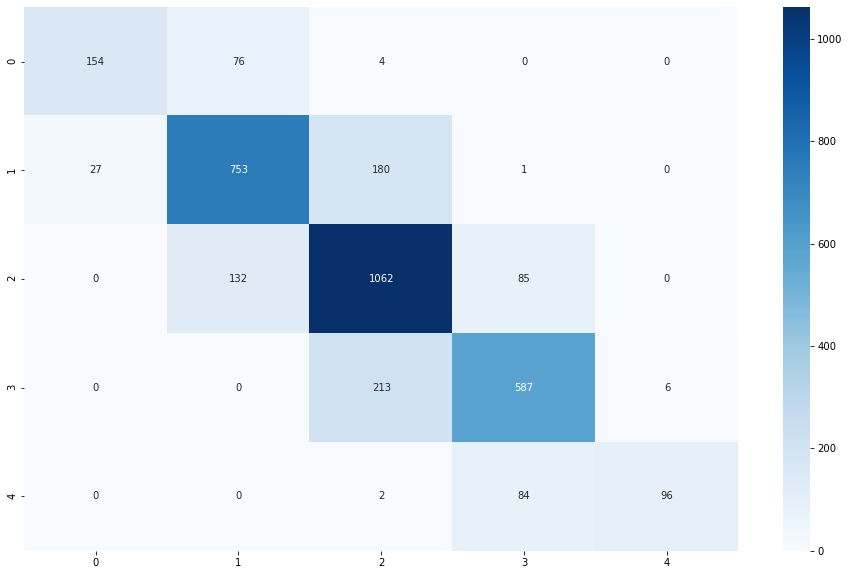

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow import keras

model = keras.models.load_model('./models/simple_conv1d_with_trades')

y_pred_2 = model.predict([X1_test, X2_test])
print("Overall accuracy: ",
      accuracy_score(relabel_prediction(y_test.argmax(axis=1)), relabel_prediction(y_pred_2.argmax(axis=1))), "\n")

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_2.argmax(axis=1))

class_percentages = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
for idx, pct in enumerate(class_percentages.diagonal()):
    print(f"class {idx} accuracy:", "{:.4f} %".format(pct*100))

df_cm = pd.DataFrame(matrix, index = [str(i) for i in range(5)],
                  columns = [str(i) for i in range(5)])
plt.figure(figsize = (16,10))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')